# Fraud Detection

## Data Analysis

In [1]:
import glob
import pandas as pd
import numpy as np

input_filenames = sorted(glob.glob('fraud_detection/*.Inputs'))
target_filenames = sorted(glob.glob('fraud_detection/*.Targets'))

df = pd.DataFrame()
for input_file, target_file in zip(input_filenames, target_filenames):
    df = df.append(pd.read_csv(input_file))
    df['fraud'] = pd.read_csv(target_file)

df = df.reset_index(drop=True)
df.head()

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,amount,domain1,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,hour2,indicator1,indicator2,state1,total,zip1
0,25.90,BELLSOUTH.NET,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,0,FL,25.90,331
1,38.85,COMCAST.NET,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,0,TX,38.85,750
2,38.85,HOTMAIL.COM,2,0,5183,19,1,0,0,0,0,1,0.0,1,1,0,0,VA,38.85,222
3,24.95,GMAIL.COM,0,0,3822,16,0,0,0,0,0,1,0.0,1,1,0,0,CA,24.95,946
4,20.72,LEVEL3.COM,3,0,3536,8,1,1,1,1,0,1,0.0,1,1,0,0,CO,20.72,805


### Dataset Profiling Report

In [2]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(df)
# profile.to_file(output_file="ProfilingResult.html")

In [3]:
# profile

### Rows containing null values

In [4]:
df[pd.isnull(df).any(axis=1)]

,amount,domain1,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,hour2,indicator1,indicator2,state1,total,zip1
72844,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
101673,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
189363,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
262125,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
356831,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
378727,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
451554,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
473409,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
546180,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
568091,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857


## Data Preprocessing

Drop highly correlated columns

In [5]:
clean_df = df.drop(columns=['hour2', 'domain1', 'total'])
clean_df.head()

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,indicator1,indicator2,state1,zip1
0,25.90,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,FL,331
1,38.85,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,TX,750
2,38.85,2,0,5183,19,1,0,0,0,0,1,0.0,1,0,0,VA,222
3,24.95,0,0,3822,16,0,0,0,0,0,1,0.0,1,0,0,CA,946
4,20.72,3,0,3536,8,1,1,1,1,0,1,0.0,1,0,0,CO,805


In [6]:
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()

In [7]:
clean_df['state1'] = clean_df['state1'].astype('category')
clean_df['state1'] = clean_df['state1'].cat.codes

clean_df.head()

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,indicator1,indicator2,state1,zip1
0,25.90,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,11,331
1,38.85,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,45,750
2,38.85,2,0,5183,19,1,0,0,0,0,1,0.0,1,0,0,47,222
3,24.95,0,0,3822,16,0,0,0,0,0,1,0.0,1,0,0,6,946
4,20.72,3,0,3536,8,1,1,1,1,0,1,0.0,1,0,0,7,805


In [8]:
clean_df.shape

(99305, 17)

In [9]:
clean_df.loc[55861]

amount           0.0
field1           4.0
field2           1.0
field3       -4216.0
field4          10.0
field5           0.0
flag1            0.0
flag2            1.0
flag3            1.0
flag4            0.0
flag5         1434.0
fraud            0.0
hour1           13.0
indicator1       0.0
indicator2       0.0
state1          20.0
zip1           708.0
Name: 55861, dtype: float64

## Split dataset

In [10]:
from sklearn.model_selection import train_test_split

X = clean_df.drop(columns=['fraud'])
y = clean_df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

## Outlier Removed in Training Data

In [11]:
train_df = X_train
train_df['fraud'] = y_train
train_df

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,hour1,indicator1,indicator2,state1,zip1,fraud
91747,10.36,3,1,798,20,0,0,1,0,0,2,14,0,0,45,766,0.0
72545,38.85,3,0,-9258,20,0,0,0,0,0,2,13,0,0,6,914,0.0
61166,38.85,3,0,-733,18,0,0,1,0,0,1,5,1,0,11,333,0.0
853918,10.36,3,0,5026,23,0,0,0,0,0,1,21,0,0,45,770,1.0
80210,38.85,2,0,2651,20,0,0,0,1,0,1,8,0,0,33,70,0.0
68504,12.95,3,0,-347,11,0,1,0,0,0,1,21,0,0,6,945,0.0
50641,38.85,3,0,-2608,7,0,1,1,0,1,1,19,0,0,11,336,0.0
93066,38.85,4,0,3318,8,2,0,1,0,0,1,12,0,0,45,750,0.0
712520,38.85,3,1,5298,23,0,0,1,1,0,1,22,0,0,11,330,1.0
75655,12.95,0,1,-5134,8,0,0,0,0,0,1,22,1,0,36,100,0.0


In [12]:
import seaborn as sns

# Same as using IQR guys
sns.boxplot(x=train_df['amount'])

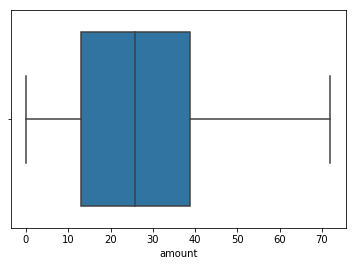

In [13]:
Q1 = train_df['amount'].quantile(0.25)
Q3 = train_df['amount'].quantile(0.75)
IQR = Q3 - Q1

outlier_removed_df = train_df
outlier_df = train_df
filter = (outlier_removed_df['amount'] >= Q1 - 1.5 * IQR) & (outlier_removed_df['amount'] <= Q3 + 1.5 *IQR)
outlier_filter = (outlier_removed_df['amount'] < Q1 - 1.5 * IQR) | (outlier_removed_df['amount'] > Q3 + 1.5 *IQR)
outlier_df = outlier_df.loc[outlier_filter]
outlier_removed_df = outlier_removed_df.loc[filter]

sns.boxplot(x=outlier_removed_df['amount'])

In [14]:
outlier_df['fraud'].value_counts()

0.0    38
1.0    17
Name: fraud, dtype: int64

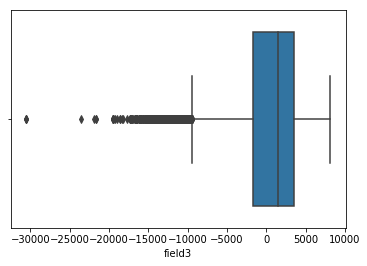

In [15]:
# Same as using IQR guys
sns.boxplot(x=outlier_removed_df['field3'])

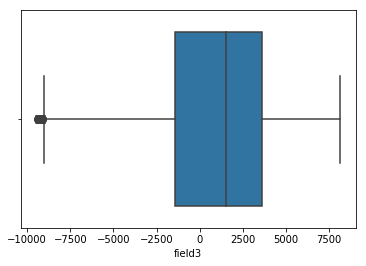

In [16]:
Q1 = outlier_removed_df['field3'].quantile(0.25)
Q3 = outlier_removed_df['field3'].quantile(0.75)
IQR = Q3 - Q1

outlier_removed_df = train_df
outlier_df = train_df
filter = (outlier_removed_df['field3'] >= Q1 - 1.5 * IQR) & (outlier_removed_df['field3'] <= Q3 + 1.5 *IQR)
outlier_filter = (outlier_removed_df['field3'] < Q1 - 1.5 * IQR) | (outlier_removed_df['field3'] > Q3 + 1.5 *IQR)
outlier_df = outlier_df.loc[outlier_filter]
outlier_removed_df = outlier_removed_df.loc[filter] 

sns.boxplot(x=outlier_removed_df['field3'])

In [17]:
outlier_df['fraud'].value_counts()

0.0    980
1.0    158
Name: fraud, dtype: int64

In [18]:
train_df = outlier_removed_df
outlier_removed_df.shape

(73340, 17)

## Oversampling & Undersampling

In [19]:
X_train = train_df.drop(columns=['fraud'])
y_train = train_df['fraud']

### Oversampling Approach

In [20]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(ratio='minority')
# X_train_oversampling = X_train
# y_train_oversampling = y_train
# X_res, y_res = smote.fit_resample(X_train_oversampling, y_train_oversampling)

# dataset_res = []
# for i in range(len(y_res)):
#     dataset_res.append(np.append(X_res[i], y_res[i]))

# dataset_res = np.asarray(dataset_res)
# dataset_res.shape
# dataset_res

Using TensorFlow backend.


array([[ 10.36      ,   3.        ,   1.        , ...,  45.        ,
        766.        ,   0.        ],
       [ 38.85      ,   3.        ,   0.        , ...,   6.        ,
        914.        ,   0.        ],
       [ 38.85      ,   3.        ,   0.        , ...,  11.        ,
        333.        ,   0.        ],
       ...,
       [ 41.07041403,   2.2000373 ,   0.        , ...,   6.        ,
        917.6001119 ,   1.        ],
       [ 22.99179572,   3.        ,   0.        , ...,  11.        ,
        342.02643229,   1.        ],
       [ 49.11085495,   0.92440135,   0.92440135, ...,   7.09954479,
        724.26795961,   1.        ]])

In [21]:
# dataset_res[0]

array([ 10.36,   3.  ,   1.  , 798.  ,  20.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   2.  ,  14.  ,   0.  ,   0.  ,  45.  , 766.  ,
         0.  ])

In [22]:
# columns = X.columns.tolist()
# columns.append('fraud')

# oversampled_df = pd.DataFrame(dataset_res, columns=columns)
# oversampled_df

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,hour1,indicator1,indicator2,state1,zip1,fraud
0,10.360000,3.000000,1.000000,798.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,14.000000,0.000000,0.000000,45.000000,766.000000,0.0
1,38.850000,3.000000,0.000000,-9258.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,0.000000,0.000000,6.000000,914.000000,0.0
2,38.850000,3.000000,0.000000,-733.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,11.000000,333.000000,0.0
3,10.360000,3.000000,0.000000,5026.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000,45.000000,770.000000,1.0
4,38.850000,2.000000,0.000000,2651.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8.000000,0.000000,0.000000,33.000000,70.000000,0.0
5,12.950000,3.000000,0.000000,-347.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000,6.000000,945.000000,0.0
6,38.850000,3.000000,0.000000,-2608.000000,7.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,19.000000,0.000000,0.000000,11.000000,336.000000,0.0
7,38.850000,4.000000,0.000000,3318.000000,8.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,45.000000,750.000000,0.0
8,38.850000,3.000000,1.000000,5298.000000,23.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,22.000000,0.000000,0.000000,11.000000,330.000000,1.0
9,12.950000,0.000000,1.000000,-5134.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000,1.000000,0.000000,36.000000,100.000000,0.0


In [23]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(oversampled_df)
# profile.to_file(output_file="OversampledProfilingResult.html")

In [24]:
# oversampled_df['fraud'].value_counts()

1.0    64515
0.0    64515
Name: fraud, dtype: int64

### Undersampling Approach

In [25]:
# from imblearn.under_sampling import CondensedNearestNeighbour 
# from sklearn.datasets import make_classification
# from collections import Counter

# X_train_undersampling = X_train
# y_train_undersampling = y_train
# # print (y_train_undersampling)
# print (X_train_undersampling.shape)

# renn = CondensedNearestNeighbour(sampling_strategy='majority')
# X_res, y_res = renn.fit_resample(X_train_undersampling, y_train_undersampling)
# # print (y)
# print (X_res.shape)

(73340, 16)


KeyboardInterrupt: 

In [ ]:
# dataset_res = []
# for i in range(len(y_res)):
#     dataset_res.append(np.append(X_res[i], y_res[i]))

# dataset_res = np.asarray(dataset_res)

# undersampled_df = pd.DataFrame(dataset_res, columns=columns)
# undersampled_df

In [ ]:
# undersampled_df['fraud'].value_counts()

In [ ]:
# y_train.value_counts()

### Hybrid Approach

In [47]:
from imblearn.combine import SMOTEENN

X_train_combine = X_train
y_train_combine = y_train

print (X_train_combine.shape)

sme = SMOTEENN(sampling_strategy='minority', ratio=0.85)
X_res, y_res = sme.fit_resample(X_train_combine, y_train_combine)

print (X_res.shape)

(73340, 16)
(59389, 16)


In [48]:
dataset_res = []
for i in range(len(y_res)):
    dataset_res.append(np.append(X_res[i], y_res[i]))

dataset_res = np.asarray(dataset_res)

combined_df = pd.DataFrame(dataset_res, columns=columns)
combined_df

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,hour1,indicator1,indicator2,state1,zip1,fraud
0,38.850000,3.000000,0.000000,-733.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,1.000000,0.0,11.000000,333.000000,0.0
1,12.950000,3.000000,0.000000,-347.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.0,6.000000,945.000000,0.0
2,12.950000,0.000000,0.000000,-1725.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.0,44.000000,381.000000,0.0
3,12.950000,2.000000,0.000000,-2262.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,18.000000,0.000000,0.0,40.000000,160.000000,0.0
4,12.950000,3.000000,0.000000,-2322.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.0,49.000000,980.000000,0.0
5,38.850000,4.000000,0.000000,5334.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,3.000000,18.000000,0.000000,0.0,6.000000,954.000000,0.0
6,38.850000,1.000000,0.000000,-5782.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000,0.000000,0.0,45.000000,773.000000,0.0
7,49.950000,2.000000,1.000000,-6298.000000,20.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,13.000000,0.000000,1.0,34.000000,877.000000,0.0
8,10.360000,3.000000,0.000000,2679.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,0.0,49.000000,986.000000,0.0
9,38.850000,3.000000,1.000000,852.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.0,47.000000,234.000000,0.0


In [49]:
combined_df['fraud'].value_counts()

0.0    32383
1.0    27006
Name: fraud, dtype: int64

## Model and Evaluation

In [50]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score

# X = oversampled_df.drop(columns=['fraud']).to_numpy()
# y = oversampled_df['fraud']

# model = MultinomialNB(alpha=1e-10)

# kf = StratifiedKFold(n_splits=10)
# for train_index, test_index in kf.split(X, y):
#     X_train_model, X_validation_model = X[train_index], X[test_index]
#     y_train_model, y_validation_model = y[train_index], y[test_index]
#     model.fit(X_train_model, y_train_model)
#     predict = model.predict(X_validation_model)
#     print ("Accuracy\t", accuracy_score(y_validation_model, predict))

In [51]:
# def show_history(history):
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()

In [57]:
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = combined_df.drop(columns=['fraud']).to_numpy()
y = combined_df['fraud']

model = Sequential()
model.add(Dense(10, input_dim=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy', 'mae'])

kf = StratifiedKFold(n_splits=3)
for train_index, test_index in kf.split(X, y):
    X_train_model, X_validation_model = X[train_index], X[test_index]
    y_train_model, y_validation_model = y[train_index], y[test_index]
    history = model.fit(X_train_model, y_train_model, epochs=20, batch_size=50,  verbose=1)
    predict = model.predict_classes(X_validation_model)
    print ("Accuracy\t", accuracy_score(y_validation_model, predict))
    print(classification_report(y_validation_model, predict, target_names=['0', '1']))

Epoch 1/20
39592/39592 [==============================] - 4s 105us/step - loss: 0.4812 - accuracy: 0.5371 - mae: 0.5192
Epoch 2/20
39592/39592 [==============================] - 4s 102us/step - loss: 0.2866 - accuracy: 0.5785 - mae: 0.4693
Epoch 3/20
39592/39592 [==============================] - 4s 101us/step - loss: 0.2498 - accuracy: 0.6010 - mae: 0.4579
Epoch 4/20
39592/39592 [==============================] - 4s 101us/step - loss: 0.2320 - accuracy: 0.6235 - mae: 0.4560
Epoch 5/20
39592/39592 [==============================] - 4s 103us/step - loss: 0.2314 - accuracy: 0.6240 - mae: 0.4524
Epoch 6/20
39592/39592 [==============================] - 4s 103us/step - loss: 0.2293 - accuracy: 0.6287 - mae: 0.4485
Epoch 7/20
39592/39592 [==============================] - 4s 104us/step - loss: 0.2279 - accuracy: 0.6337 - mae: 0.4455
Epoch 8/20
39592/39592 [==============================] - 4s 104us/step - loss: 0.2275 - accuracy: 0.6365 - mae: 0.4444
Epoch 9/20
39592/39592 [================

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

predict_test = model.predict_classes(X_test)
print ("Accuracy\t", accuracy_score(y_test, predict_test))
print ("Precision\t", precision_score(y_test, predict_test, average='macro'))
print ("Recall\t\t", recall_score(y_test, predict_test, average='macro'))
print ("F1 Score\t", f1_score(y_test, predict_test, average='macro'))

print(classification_report(y_test, predict_test, target_names=['0', '1']))

Accuracy	 0.7731904781085109
Precision	 0.5743002633254077
Recall		 0.6135379279299373
F1 Score	 0.582365425943415
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     21833
           1       0.24      0.40      0.30      2994

    accuracy                           0.77     24827
   macro avg       0.57      0.61      0.58     24827
weighted avg       0.83      0.77      0.80     24827

